# RecogNYCe

## Project Description
See [README](./README.md)

## Code

In [121]:
!pip install shapely
!pip install geopandas
!pip install mapillary

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mapillary from https://files.pythonhosted.org/packages/4b/07/c4ccd6677e29ab87bd4cb4ace7b0b3c216596eb9116a6d9f608d262916e3/mapillary-1.0.12-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.5/283.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import json
import shapely
import pandas as pd
import geopandas as gpd
from utils.geojson_utils import Neighborhoods

### Location Data Exploration

Loading neighborhoods
len(nb.neighborhoods) = 188
Plotting neighborhoods


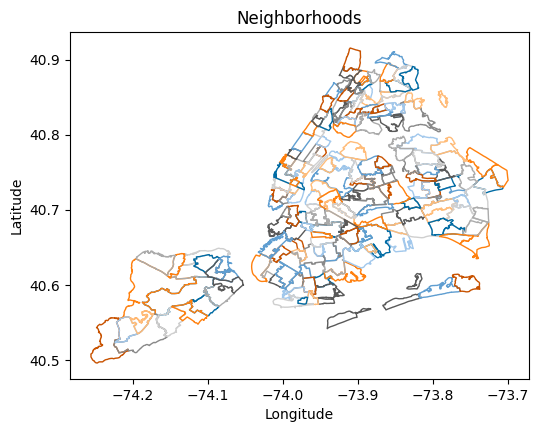

Sampling neighborhoods


KeyboardInterrupt: 

In [8]:
# Loading geojson file
location_dir = "./data/location/"
geo_file = "nyc_neighborhoods.geojson"
geo_path = os.path.join(location_dir, geo_file)

# Load geojson file
print("Loading neighborhoods")
nb = Neighborhoods()
nb.load_geojson(geo_path)

print(f"{len(nb.neighborhoods) = }")

# Plot zones
print("Plotting neighborhoods")
ax = nb.plot()
# ax.legend()
plt.show()

# Sample coordinates in neighborhoods
print("Sampling neighborhoods")
samples = nb.generate_samples()

# Plot samples
print("Plotting samples")
ax = nb.plot()
# ax.legend()
plt.show()


Loading boroughs
len(nb.neighborhoods) = 5
Plotting boroughs


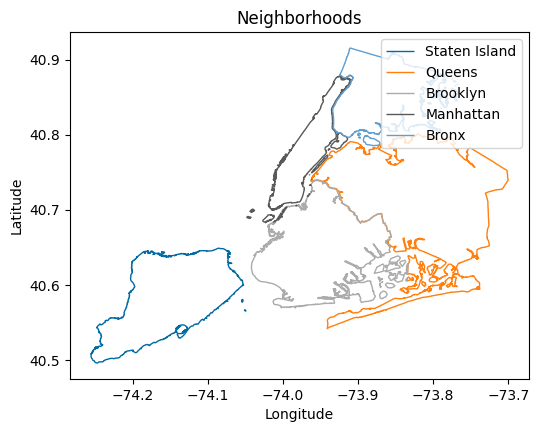

Sampling boroughs
Plotting samples


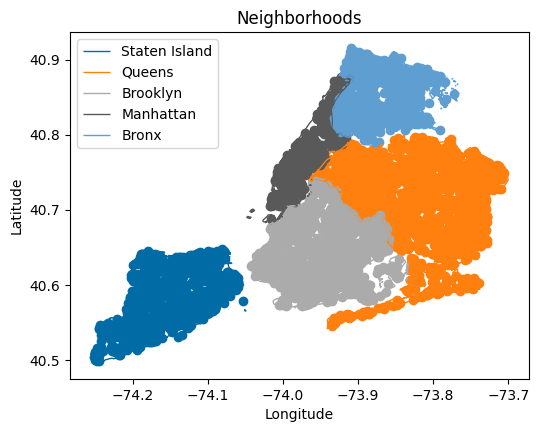

In [9]:
geo_file = "nyc_boroughs.geojson"
geo_path = os.path.join(location_dir, geo_file)

# Load geojson file
print("Loading boroughs")
nb = Neighborhoods()
nb.load_geojson(geo_path)

print(f"{len(nb.neighborhoods) = }")

# Plot zones
print("Plotting boroughs")
ax = nb.plot()
ax.legend()
plt.show()

# Sample coordinates in neighborhoods
print("Sampling boroughs")
samples = nb.generate_samples()

# Plot samples
print("Plotting samples")
ax = nb.plot()
ax.legend()
plt.show()

### Scraping street-level image data from coordinates

In [10]:
# Get some random coordinates from manhattan
coords = samples[nb.neighborhood_names.index("Manhattan")][np.random.choice(len(samples[3]), size=10)]
print(coords)

[[-74.00318234  40.71546832]
 [-73.93833247  40.81259019]
 [-73.92501836  40.8727945 ]
 [-73.98963178  40.76572165]
 [-73.97962371  40.7279944 ]
 [-73.94764499  40.78628989]
 [-73.92123001  40.78816927]
 [-73.95974174  40.76973193]
 [-74.00022129  40.7459592 ]
 [-73.98639937  40.74325388]]


In [53]:
from utils.mapillary_utils import download_images

In [64]:
for coord in coords:
    download_images(coord, "./Manhattan")

Requesting GET to https://tiles.mapillary.com/maps/vtp/mly1_public/2/14/4824/6159/?access_token=MLY%7C6867982663239857%7C9464efea9dc8b162177721c4f71fefad
Response 200 OK received in 404ms
[30 53 58  5 22 17  0 22 42  9]
Requesting GET to https://graph.mapillary.com/154549683193677/?fields=thumb_2048_url,geometry&access_token=MLY%7C6867982663239857%7C9464efea9dc8b162177721c4f71fefad
Response 200 OK received in 172ms
Requesting GET to https://graph.mapillary.com/1732636476909204/?fields=thumb_2048_url,geometry&access_token=MLY%7C6867982663239857%7C9464efea9dc8b162177721c4f71fefad
Response 200 OK received in 228ms
Requesting GET to https://graph.mapillary.com/1572093699665797/?fields=thumb_2048_url,geometry&access_token=MLY%7C6867982663239857%7C9464efea9dc8b162177721c4f71fefad
Response 200 OK received in 390ms
Requesting GET to https://graph.mapillary.com/1130988407400109/?fields=thumb_2048_url,geometry&access_token=MLY%7C6867982663239857%7C9464efea9dc8b162177721c4f71fefad
Response 200 OK